In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris_data=iris.data
iris_target=iris.target

In [4]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [6]:
df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

In [7]:
df_data=pd.DataFrame(iris.data, columns=iris.feature_names)
df_target=pd.DataFrame(iris.target, columns=["target"])
totall_data=pd.concat([df_data,df_target], axis=1)

In [8]:
totall_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [9]:
df_target.columns

Index(['target'], dtype='object')

In [10]:
df_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [11]:
print(df_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [12]:
df_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [13]:
S = iris['frame']
print(S)

None


In [14]:
S = df_data['sepal length (cm)']
S.value_counts

<bound method IndexOpsMixin.value_counts of 0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64>

Text(0.5, 1.0, 'Sepal Length')

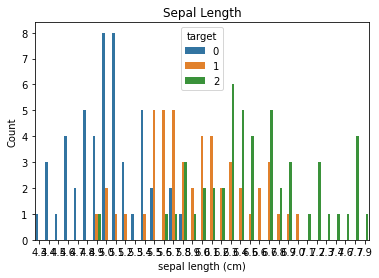

In [15]:
sns.countplot(data=totall_data, x="sepal length (cm)", hue="target")
plt.xlabel("sepal length (cm)")
plt.ylabel("Count")
plt.title("Sepal Length")

Text(0.5, 1.0, 'Alcohol')

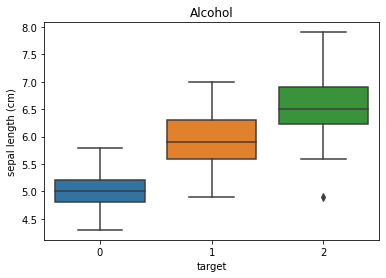

In [16]:
sns.boxplot(x="target", y="sepal length (cm)", data=totall_data)
plt.title("Alcohol")

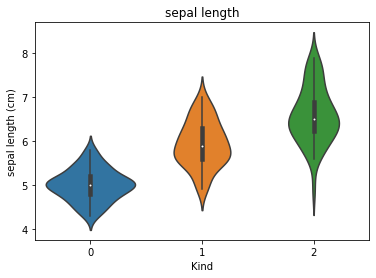

In [17]:
sns.violinplot(x="target", y="sepal length (cm)", data=totall_data)
plt.title("sepal length")
plt.xlabel('Kind')
plt.show()

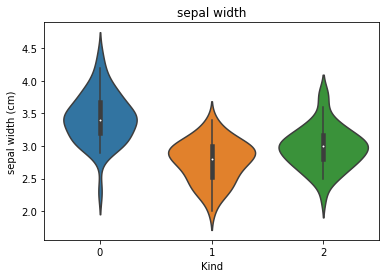

In [18]:
sns.violinplot(x="target", y="sepal width (cm)", data=totall_data)
plt.title("sepal width")
plt.xlabel('Kind')
plt.show()

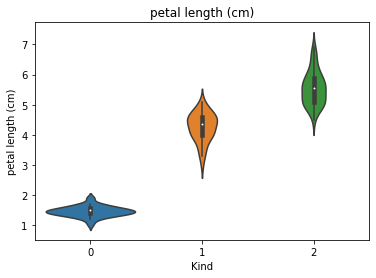

In [19]:
sns.violinplot(x="target", y="petal length (cm)", data=totall_data)
plt.title("petal length (cm)")
plt.xlabel('Kind')
plt.show()

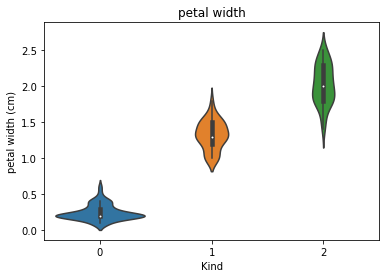

In [20]:
sns.violinplot(x="target", y="petal width (cm)", data=totall_data)
plt.title("petal width")
plt.xlabel('Kind')
plt.show()

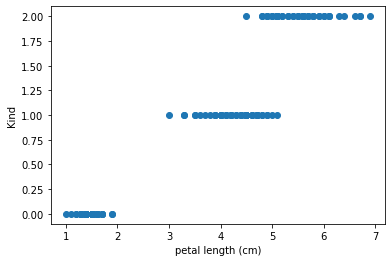

In [21]:
plt.scatter(totall_data['petal length (cm)'], totall_data['target'])
plt.xlabel('petal length (cm)')
plt.ylabel('Kind')
plt.show()

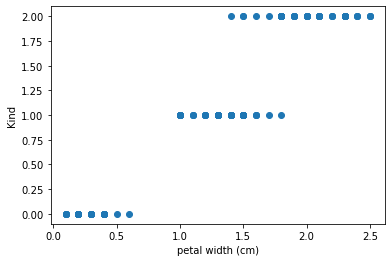

In [22]:
plt.scatter(totall_data['petal width (cm)'], totall_data['target'])
plt.xlabel('petal width (cm)')
plt.ylabel('Kind')
plt.show()

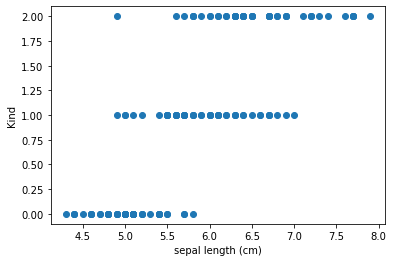

In [23]:
plt.scatter(totall_data['sepal length (cm)'], totall_data['target'])
plt.xlabel('sepal length (cm)')
plt.ylabel('Kind')
plt.show()

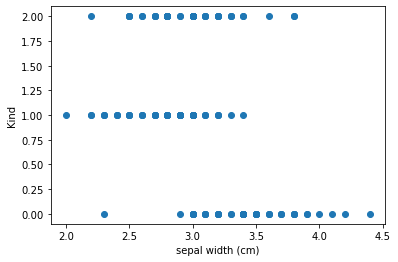

In [24]:
plt.scatter(totall_data['sepal width (cm)'], totall_data['target'])
plt.xlabel('sepal width (cm)')
plt.ylabel('Kind')
plt.show()

In [25]:
S = df_data['sepal width (cm)']
S.value_counts

<bound method IndexOpsMixin.value_counts of 0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64>

Text(0.5, 1.0, 'Sepal Length')

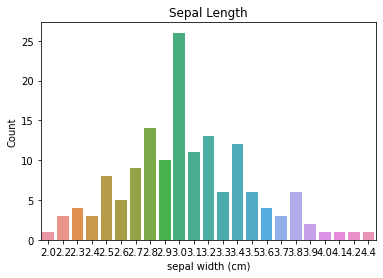

In [26]:
sns.countplot(data=df_data, x="sepal width (cm)")
plt.xlabel("sepal width (cm)")
plt.ylabel("Count")
plt.title("Sepal Length")

Text(0.5, 1.0, 'Sepal Width')

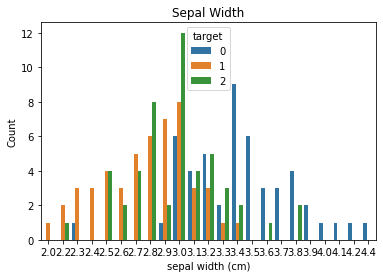

In [27]:
sns.countplot(data=totall_data, x="sepal width (cm)", hue="target")
plt.xlabel("sepal width (cm)")
plt.ylabel("Count")
plt.title("Sepal Width")

Text(0.5, 1.0, 'Petal Length')

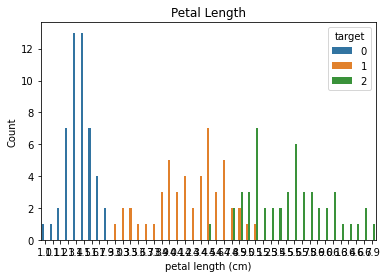

In [28]:
sns.countplot(data=totall_data, x="petal length (cm)", hue="target")
plt.xlabel("petal length (cm)")
plt.ylabel("Count")
plt.title("Petal Length")

Text(0.5, 1.0, 'Petal Width')

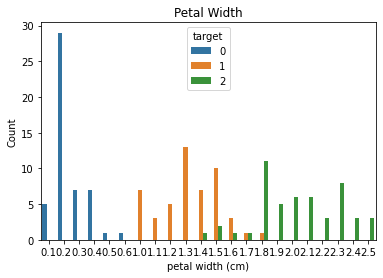

In [29]:
sns.countplot(data=totall_data, x="petal width (cm)", hue="target")
plt.xlabel("petal width (cm)")
plt.ylabel("Count")
plt.title("Petal Width")

In [30]:
df_data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

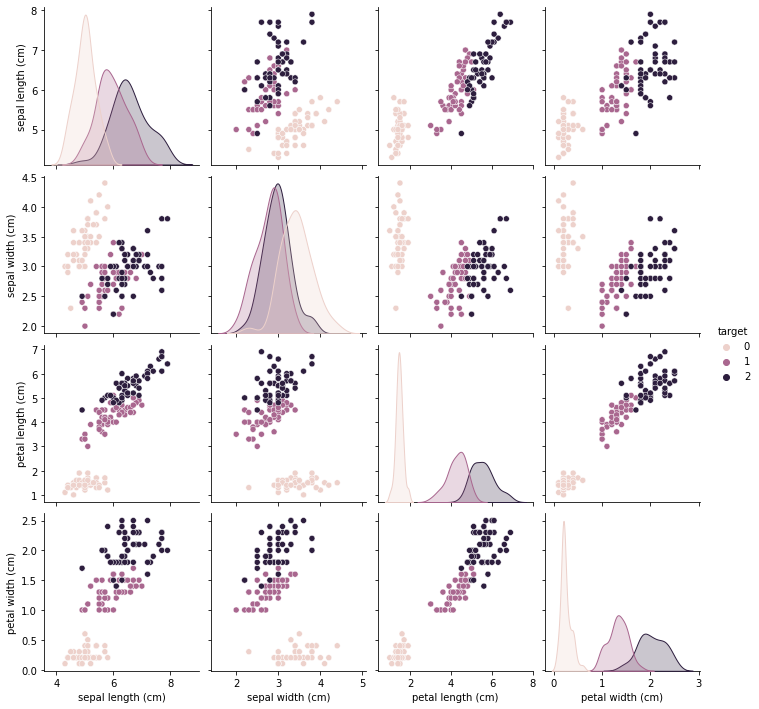

In [31]:
sns.pairplot(totall_data,
             vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
            hue ='target')
plt.show()

In [32]:
Y=totall_data[['target']]
Y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [33]:
X=totall_data.drop(['target'], axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=5)

In [35]:
print("X_train.shape :", X_train.shape)

print("y_train.shape :", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape : (120, 4)
y_train.shape : (120, 1)
X_test.shape: (30, 4)
y_test.shape: (30, 1)


In [36]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9666666666666667
[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, pred_lr)
print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9666666666666667
[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9333333333333333
[[ 8  0  0]
 [ 0  9  2]
 [ 0  0 11]]


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9
[[ 8  0  0]
 [ 0 10  1]
 [ 0  2  9]]


In [40]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.9333333333333333
[[ 8  0  0]
 [ 0  9  2]
 [ 0  0 11]]


In [41]:
model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=4)

In [42]:
model.score(X_test, y_test.values.ravel())

0.9333333333333333

In [43]:
a = model.score(X_test, y_test)
a

0.9333333333333333

In [44]:
for n in range(3, 30):
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train.values.ravel())
    score = model.score(X_test, y_test)
    if score > a:
        print(n)
        a = score
        max = n
model.n_neighbors = max
model.fit(X_train, y_train.values.ravel())
max_S = model.score(X_test, y_test)
print("정확도가 가장 높은 최근접 이웃 개수는 정확도가 %.9f%%인 %d 입니다."%(max_S*100, max))

6
8
정확도가 가장 높은 최근접 이웃 개수는 정확도가 100.000000000%인 8 입니다.


<AxesSubplot:title={'center':'Logistic Regression Confusion Matrix'}>

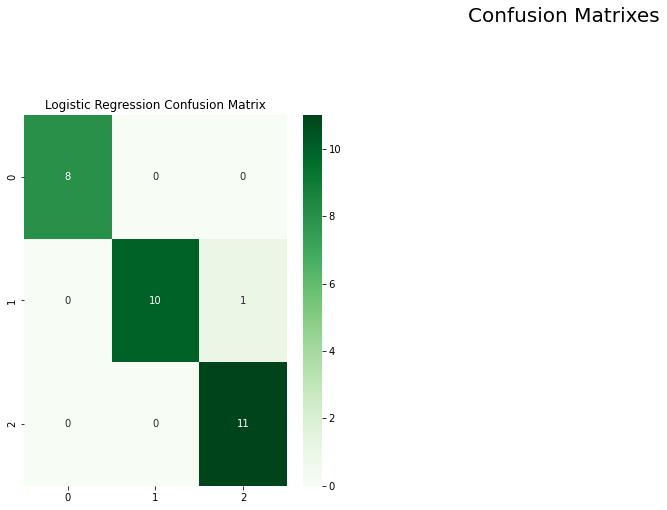

In [45]:
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=True,annot=True,cmap="Greens",fmt="d")